<a href="https://colab.research.google.com/github/TiredRebel/Math_hw_2/blob/main/Math_homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задача 1. Аналітика музичного сервісу

In [7]:
# --- Дані ---
rock_fans = {101, 102, 103, 105, 107, 109, 110, 112, 115, 118}
pop_fans = {102, 104, 105, 106, 108, 110, 111, 113, 115, 117}
jazz_fans = {103, 105, 108, 110, 112, 114, 115, 116, 119, 120}

# --- 1) Загальне охоплення ---
all_unique = rock_fans | pop_fans | jazz_fans

# --- 2) Слухали всі три жанри ---
all_three = rock_fans & pop_fans & jazz_fans

# --- 3) "Чисті рокери" ---
pure_rockers = rock_fans - (pop_fans | jazz_fans)

# --- 4) Рівно два жанри ---
exactly_two = (
    (rock_fans & pop_fans) - jazz_fans
    | (rock_fans & jazz_fans) - pop_fans
    | (pop_fans & jazz_fans) - rock_fans
)

# --- Вивід результатів ---
print("1) Загальне охоплення (union):")
print("IDs:", sorted(all_unique))
print("Count:", len(all_unique), "\n")

print("2) Всеїдні меломани (intersection of all three):")
print("IDs:", sorted(all_three))
print("Count:", len(all_three), "\n")

print("3) Чисті рокери (rock only):")
print("IDs:", sorted(pure_rockers))
print("Count:", len(pure_rockers), "\n")

print("4) Рівно два жанри:")
print("IDs:", sorted(exactly_two))
print("Count:", len(exactly_two))

1) Загальне охоплення (union):
IDs: [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]
Count: 20 

2) Всеїдні меломани (intersection of all three):
IDs: [105, 110, 115]
Count: 3 

3) Чисті рокери (rock only):
IDs: [101, 107, 109, 118]
Count: 4 

4) Рівно два жанри:
IDs: [102, 103, 108, 112]
Count: 4


## Задача 2. Конфігуратор доступу до системи (RBAC)

**Коментар:** Маємо 5 булевих параметрів користувача:
- `is_employee` — співробітник
- `is_verified` — верифікований
- `is_premium` — має premium
- `is_admin` — адміністратор
- `is_banned` — заблокований

Потрібно визначити доступ до 4 секцій: **Base, Premium, Admin, Secret**.

---

### Правила доступу (логічні вирази)

**Коментар:** У всіх правилах обов’язково має бути `is_verified = True` і `is_banned = False`.

- **Base**:
  - користувач **співробітник** AND **верифікований** AND **не заблокований**
  - Формула:
    - `Base = is_employee AND is_verified AND (NOT is_banned)`

- **Premium**:
  - (**співробітник** OR **має premium**) AND **верифікований** AND **не заблокований**
  - Формула:
    - `Premium = (is_employee OR is_premium) AND is_verified AND (NOT is_banned)`

- **Admin**:
  - **адмін** AND **верифікований** AND **не заблокований**
  - Формула:
    - `Admin = is_admin AND is_verified AND (NOT is_banned)`

- **Secret**:
  - (**адмін** OR (**співробітник** AND **premium**)) AND **верифікований** AND **не заблокований**
  - Формула:
    - `Secret = (is_admin OR (is_employee AND is_premium)) AND is_verified AND (NOT is_banned)`

---

## Програмна частина (таблиця істинності 32 рядки + аналіз)

Нижче код:
1) Реалізує `check_access(...)`  
2) Генерує всі 32 комбінації (`itertools.product`)  
3) Друкує таблицю у форматі 0/1  
4) Рахує:
   - скільки разів є **повний доступ** до всіх 4 секцій
   - чи існує випадок **Premium=1, але Base=0**, і показує приклад + пояснення


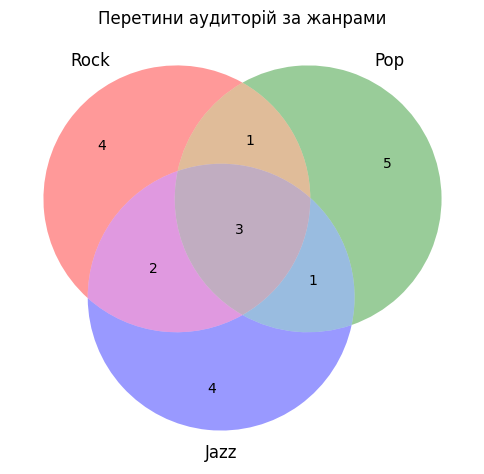

In [8]:
# Якщо бібліотеки немає — розкоментуй і виконай:
# !pip -q install matplotlib-venn

import matplotlib.pyplot as plt
from matplotlib_venn import venn3

plt.figure(figsize=(6, 6))
venn3([rock_fans, pop_fans, jazz_fans], set_labels=("Rock", "Pop", "Jazz"))
plt.title("Перетини аудиторій за жанрами")
plt.show()


## Задача 2. Конфігуратор доступу до системи (RBAC)

**Коментар:** Маємо 5 булевих параметрів користувача:
- `is_employee` — співробітник
- `is_verified` — верифікований
- `is_premium` — має premium
- `is_admin` — адміністратор
- `is_banned` — заблокований

Потрібно визначити доступ до 4 секцій: **Base, Premium, Admin, Secret**.

---

### Правила доступу (логічні вирази)

**Коментар:** У всіх правилах обов’язково має бути `is_verified = True` і `is_banned = False`.

- **Base**:
  - користувач **співробітник** AND **верифікований** AND **не заблокований**
  - Формула:
    - `Base = is_employee AND is_verified AND (NOT is_banned)`

- **Premium**:
  - (**співробітник** OR **має premium**) AND **верифікований** AND **не заблокований**
  - Формула:
    - `Premium = (is_employee OR is_premium) AND is_verified AND (NOT is_banned)`

- **Admin**:
  - **адмін** AND **верифікований** AND **не заблокований**
  - Формула:
    - `Admin = is_admin AND is_verified AND (NOT is_banned)`

- **Secret**:
  - (**адмін** OR (**співробітник** AND **premium**)) AND **верифікований** AND **не заблокований**
  - Формула:
    - `Secret = (is_admin OR (is_employee AND is_premium)) AND is_verified AND (NOT is_banned)`

---

## Програмна частина (таблиця істинності 32 рядки + аналіз)

Нижче код:
1) Реалізує `check_access(...)`  
2) Генерує всі 32 комбінації (`itertools.product`)  
3) Друкує таблицю у форматі 0/1  
4) Рахує:
   - скільки разів є **повний доступ** до всіх 4 секцій
   - чи існує випадок **Premium=1, але Base=0**, і показує приклад + пояснення


In [5]:
from itertools import product
from typing import Dict


def check_access(
    is_employee: bool,
    is_verified: bool,
    is_premium: bool,
    is_admin: bool,
    is_banned: bool,
) -> Dict[str, bool]:
    """
    Return access flags for 4 sections:
    Base, Premium, Admin, Secret -> True/False.
    """
    # All access rules require verified=True and banned=False
    not_banned = not is_banned
    verified_and_not_banned = is_verified and not_banned

    base = is_employee and verified_and_not_banned
    premium = (is_employee or is_premium) and verified_and_not_banned
    admin = is_admin and verified_and_not_banned
    secret = (is_admin or (is_employee and is_premium)) and verified_and_not_banned

    return {
        "Base": base,
        "Premium": premium,
        "Admin": admin,
        "Secret": secret,
    }


def b01(value: bool) -> int:
    """Convert boolean to 1/0 for table printing."""
    return int(value)


def generate_rows():
    """Generate truth table rows for all 32 parameter combinations."""
    for is_employee, is_verified, is_premium, is_admin, is_banned in product(
        [True, False],
        repeat=5,
    ):
        access = check_access(
            is_employee=is_employee,
            is_verified=is_verified,
            is_premium=is_premium,
            is_admin=is_admin,
            is_banned=is_banned,
        )
        yield (
            is_employee,
            is_verified,
            is_premium,
            is_admin,
            is_banned,
            access["Base"],
            access["Premium"],
            access["Admin"],
            access["Secret"],
        )


def print_table(rows) -> None:
    """Print the truth table in a readable 0/1 format."""
    print(
        f"{'Emp':>3} {'Ver':>3} {'Prem':>4} {'Adm':>3} {'Ban':>3}  | "
        f"{'Base':>4} {'Prem':>4} {'Adm':>3} {'Secr':>4}"
    )
    print("-" * 46)

    for (
        emp,
        ver,
        prem,
        adm,
        ban,
        base,
        prem_acc,
        adm_acc,
        secr,
    ) in rows:
        print(
            f"{b01(emp):>3} {b01(ver):>3} {b01(prem):>4} {b01(adm):>3} {b01(ban):>3}  | "
            f"{b01(base):>4} {b01(prem_acc):>4} {b01(adm_acc):>3} {b01(secr):>4}"
        )


def analyze(rows) -> None:
    """Analyze full-access cases and Premium-without-Base cases."""
    full_access = [r for r in rows if r[5] and r[6] and r[7] and r[8]]
    premium_not_base = [r for r in rows if r[6] and (not r[5])]

    print("\n=== Аналіз результатів ===")
    print(
        "1) Кількість випадків з повним доступом до всіх 4 секцій:",
        len(full_access),
    )
    print(
        "2) Кількість випадків, де Premium=1, але Base=0:",
        len(premium_not_base),
    )

    if premium_not_base:
        print("\nПриклад(и) комбінацій Premium=1, Base=0:")
        print("Emp Ver Prem Adm Ban | Base Prem Adm Secr")
        for (
            emp,
            ver,
            prem,
            adm,
            ban,
            base,
            prem_acc,
            adm_acc,
            secr,
        ) in premium_not_base:
            print(
                f"{b01(emp)}   {b01(ver)}   {b01(prem)}    {b01(adm)}   {b01(ban)}  |  "
                f"{b01(base)}    {b01(prem_acc)}    {b01(adm_acc)}    {b01(secr)}"
            )

        print("\nПояснення (чому так можливо):")
        print("- Base вимагає Emp=1, Ver=1, Ban=0.")
        print("- Premium вимагає (Emp=1 АБО Prem=1), Ver=1, Ban=0.")
        print(
            "Отже, якщо Emp=0, але Prem=1, і при цьому Ver=1 та Ban=0 -> "
            "Premium=1, але Base=0."
        )

    print("\n=== Підсумок (для здачі) ===")
    print(
        "Повний доступ можливий, коли Ver=1 і Ban=0, а також Emp=1 і Adm=1 "
        "(Prem може бути 0 або 1)."
    )
    print(
        "Premium без Base можливий, коли Emp=0, Prem=1, Ver=1, Ban=0 "
        "(адмін може бути 0 або 1)."
    )


def main() -> None:
    rows = list(generate_rows())
    print_table(rows)
    analyze(rows)


if __name__ == "__main__":
    main()


Emp Ver Prem Adm Ban  | Base Prem Adm Secr
----------------------------------------------
  1   1    1   1   1  |    0    0   0    0
  1   1    1   1   0  |    1    1   1    1
  1   1    1   0   1  |    0    0   0    0
  1   1    1   0   0  |    1    1   0    1
  1   1    0   1   1  |    0    0   0    0
  1   1    0   1   0  |    1    1   1    1
  1   1    0   0   1  |    0    0   0    0
  1   1    0   0   0  |    1    1   0    0
  1   0    1   1   1  |    0    0   0    0
  1   0    1   1   0  |    0    0   0    0
  1   0    1   0   1  |    0    0   0    0
  1   0    1   0   0  |    0    0   0    0
  1   0    0   1   1  |    0    0   0    0
  1   0    0   1   0  |    0    0   0    0
  1   0    0   0   1  |    0    0   0    0
  1   0    0   0   0  |    0    0   0    0
  0   1    1   1   1  |    0    0   0    0
  0   1    1   1   0  |    0    1   1    1
  0   1    1   0   1  |    0    0   0    0
  0   1    1   0   0  |    0    1   0    0
  0   1    0   1   1  |    0    0   0    0
  0   1

## Задача 3. Формування "Команди мрії"

In [10]:
import math
from typing import Dict


def validate_inputs(
    backend_candidates: int,
    frontend_candidates: int,
    designer_candidates: int,
    backend_needed: int,
    frontend_needed: int,
    designers_needed: int,
) -> None:
    """
    Перевіряє коректність вхідних даних:
    - усі значення мають бути цілими невід'ємними числами
    - для кожної групи має виконуватись k <= n (не можна вибрати більше, ніж є)
    У разі помилки піднімає ValueError з поясненням.
    """
    values = {
        "backend_candidates": backend_candidates,
        "frontend_candidates": frontend_candidates,
        "designer_candidates": designer_candidates,
        "backend_needed": backend_needed,
        "frontend_needed": frontend_needed,
        "designers_needed": designers_needed,
    }

    for name, value in values.items():
        if not isinstance(value, int):
            raise ValueError(
                f"{name} має бути цілим числом, отримано {type(value).__name__}."
            )
        if value < 0:
            raise ValueError(f"{name} має бути невід'ємним, отримано {value}.")

    if backend_needed > backend_candidates:
        raise ValueError(
            "backend_needed не може бути більшим за backend_candidates "
            f"({backend_needed} > {backend_candidates})."
        )
    if frontend_needed > frontend_candidates:
        raise ValueError(
            "frontend_needed не може бути більшим за frontend_candidates "
            f"({frontend_needed} > {frontend_candidates})."
        )
    if designers_needed > designer_candidates:
        raise ValueError(
            "designers_needed не може бути більшим за designer_candidates "
            f"({designers_needed} > {designer_candidates})."
        )


def count_teams(
    backend_candidates: int,
    frontend_candidates: int,
    designer_candidates: int,
    backend_needed: int = 2,
    frontend_needed: int = 2,
    designers_needed: int = 1,
) -> Dict[str, int]:
    """
    Рахує кількість можливих унікальних команд за правилом сполучень.
    Порядок вибору людей не важливий, тому використовуємо math.comb(n, k).

    Повертає словник з проміжними результатами:
    - backend_ways, frontend_ways, designer_ways, total_teams
    """
    # Перевіряємо валідність даних перед обчисленнями
    validate_inputs(
        backend_candidates=backend_candidates,
        frontend_candidates=frontend_candidates,
        designer_candidates=designer_candidates,
        backend_needed=backend_needed,
        frontend_needed=frontend_needed,
        designers_needed=designers_needed,
    )

    # Кількість способів вибрати 2 back-end з N
    backend_ways = math.comb(backend_candidates, backend_needed)

    # Кількість способів вибрати 2 front-end з N
    frontend_ways = math.comb(frontend_candidates, frontend_needed)

    # Кількість способів вибрати 1 дизайнера з N
    designer_ways = math.comb(designer_candidates, designers_needed)

    # Загальна кількість команд = добуток способів вибору з кожної групи
    total_teams = backend_ways * frontend_ways * designer_ways

    return {
        "backend_ways": backend_ways,
        "frontend_ways": frontend_ways,
        "designer_ways": designer_ways,
        "total_teams": total_teams,
    }


def main() -> None:
    # Вхідні дані за умовою задачі
    backend_candidates = 8
    frontend_candidates = 6
    designer_candidates = 4

    # Обчислюємо кількість команд
    result = count_teams(
        backend_candidates=backend_candidates,
        frontend_candidates=frontend_candidates,
        designer_candidates=designer_candidates,
    )

    # Виводимо проміжні значення та фінальну відповідь
    print("=== Формування 'Команди мрії' ===")
    print(f"Back-end:   C({backend_candidates}, 2) = {result['backend_ways']}")
    print(f"Front-end:  C({frontend_candidates}, 2) = {result['frontend_ways']}")
    print(f"Designer:   C({designer_candidates}, 1) = {result['designer_ways']}")
    print("-" * 42)
    print(f"Загальна кількість унікальних команд: {result['total_teams']}")


if __name__ == "__main__":
    # Точка входу в програму
    main()


=== Формування 'Команди мрії' ===
Back-end:   C(8, 2) = 28
Front-end:  C(6, 2) = 15
Designer:   C(4, 1) = 4
------------------------------------------
Загальна кількість унікальних команд: 1680


## Задача 4. Аналіз соціальної мережі компанії**

In [11]:
from __future__ import annotations


def build_adjacency_list() -> dict[str, list[str]]:
    """
    Повертає список суміжності (словник) для неорієнтованого графа.
    Ключ — ім'я співробітника, значення — список його контактів.
    """
    return {
        "Анна": ["Богдан", "Віктор", "Ганна"],
        "Богдан": ["Анна", "Віктор", "Дмитро"],
        "Віктор": ["Анна", "Богдан", "Ганна", "Дмитро"],
        "Ганна": ["Анна", "Віктор", "Євген"],
        "Дмитро": ["Богдан", "Віктор", "Євген"],
        "Євген": ["Ганна", "Дмитро"],
    }


def build_edges(adj: dict[str, list[str]]) -> list[tuple[str, str]]:
    """
    Будує список унікальних ребер (без дублювання) для неорієнтованого графа.

    Ідея: ребро (u, v) додаємо в канонічному вигляді (min(u,v), max(u,v)).
    """
    edges_set: set[tuple[str, str]] = set()

    for u, neighbors in adj.items():
        for v in neighbors:
            edge = (u, v) if u < v else (v, u)
            edges_set.add(edge)

    return sorted(edges_set)


def build_adjacency_matrix(
    nodes: list[str],
    edges: list[tuple[str, str]],
) -> list[list[int]]:
    """
    Будує матрицю суміжності для неорієнтованого графа.
    Повертає вкладені списки (list[list[int]]).
    """
    index = {name: i for i, name in enumerate(nodes)}
    size = len(nodes)
    matrix = [[0 for _ in range(size)] for _ in range(size)]

    for u, v in edges:
        i = index[u]
        j = index[v]
        matrix[i][j] = 1
        matrix[j][i] = 1  # симетрія для неорієнтованого графа

    return matrix


def compute_degrees(adj: dict[str, list[str]]) -> dict[str, int]:
    """Обчислює степінь кожної вершини (кількість контактів)."""
    return {node: len(neighbors) for node, neighbors in adj.items()}


def find_min_max_degree(degrees: dict[str, int]) -> tuple[list[str], list[str]]:
    """
    Повертає:
    - список найкомунікабельніших (макс. степінь)
    - список найменш комунікабельних (мін. степінь)
    """
    max_degree = max(degrees.values())
    min_degree = min(degrees.values())

    max_nodes = [n for n, d in degrees.items() if d == max_degree]
    min_nodes = [n for n, d in degrees.items() if d == min_degree]

    return max_nodes, min_nodes


def print_adjacency_matrix(nodes: list[str], matrix: list[list[int]]) -> None:
    """Друк матриці суміжності з підписами."""
    header = " " * 10 + " ".join(f"{n:>7}" for n in nodes)
    print("\nМатриця суміжності:")
    print(header)
    print("-" * len(header))

    for name, row in zip(nodes, matrix):
        row_str = " ".join(f"{value:>7}" for value in row)
        print(f"{name:>10} {row_str}")


def main() -> None:
    # 1) Список суміжності (словник)
    adjacency_list = build_adjacency_list()

    # Вузли (візьмемо стабільний порядок: алфавітний)
    nodes = sorted(adjacency_list.keys())

    # 2) Список ребер (унікальні ребра без дублювання)
    edges = build_edges(adjacency_list)

    # 3) Матриця суміжності (вкладені списки)
    adjacency_matrix = build_adjacency_matrix(nodes, edges)

    # 4) Степені вершин
    degrees = compute_degrees(adjacency_list)
    max_nodes, min_nodes = find_min_max_degree(degrees)

    # 5) Перевірка теореми: сума степенів = 2 * кількість ребер
    sum_degrees = sum(degrees.values())
    edges_count = len(edges)
    theorem_holds = sum_degrees == 2 * edges_count

    # === Вивід результатів ===
    print("=== 1) Список суміжності (словник) ===")
    for node in nodes:
        print(f"{node}: {adjacency_list[node]}")

    print("\n=== 2) Список ребер (унікальні) ===")
    print(edges)
    print(f"Кількість ребер: {edges_count}")

    print_adjacency_matrix(nodes, adjacency_matrix)

    print("\n=== 3) Степені вершин ===")
    for node in nodes:
        print(f"deg({node}) = {degrees[node]}")

    print("\nНайбільш комунікабельні (макс. степінь):", max_nodes)
    print("Найменш комунікабельні (мін. степінь):", min_nodes)

    print("\n=== 4) Теорема про суму степенів ===")
    print(f"Сума степенів = {sum_degrees}")
    print(f"2 * кількість ребер = {2 * edges_count}")
    print("Рівність виконується:", theorem_holds)


if __name__ == "__main__":
    main()


=== 1) Список суміжності (словник) ===
Євген: ['Ганна', 'Дмитро']
Анна: ['Богдан', 'Віктор', 'Ганна']
Богдан: ['Анна', 'Віктор', 'Дмитро']
Віктор: ['Анна', 'Богдан', 'Ганна', 'Дмитро']
Ганна: ['Анна', 'Віктор', 'Євген']
Дмитро: ['Богдан', 'Віктор', 'Євген']

=== 2) Список ребер (унікальні) ===
[('Євген', 'Ганна'), ('Євген', 'Дмитро'), ('Анна', 'Богдан'), ('Анна', 'Віктор'), ('Анна', 'Ганна'), ('Богдан', 'Віктор'), ('Богдан', 'Дмитро'), ('Віктор', 'Ганна'), ('Віктор', 'Дмитро')]
Кількість ребер: 9

Матриця суміжності:
            Євген    Анна  Богдан  Віктор   Ганна  Дмитро
---------------------------------------------------------
     Євген       0       0       0       0       1       1
      Анна       0       0       1       1       1       0
    Богдан       0       1       0       1       0       1
    Віктор       0       1       1       0       1       1
     Ганна       1       1       0       1       0       0
    Дмитро       1       0       1       1       0       0

=== 3)